### Libraries

In [1]:
import geopandas as gpd
from geopandas.tools import overlay
import matplotlib.pyplot as plt
import os 
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/tmp/ipykernel_32605/3924256960.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
/opt/conda/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. Fo

### GeoDataFrame Object of 'Espacios Públicos en QRO'

In [2]:
schema = 'espacios_publicos'
table = 'ep_qro'
gdf = aup.gdf_from_db(table,schema)
gdf.head()

,geografico,nombre,tipo,cveserv,cvegeo,geometria,fechaact,condicion,geometry
0,Bordo,Ninguno,No Aplica,036,220010001,Area,12/2007,No Aplica,"POLYGON ((-100.14119 20.18851, -100.14112 20.1..."
1,Bordo,Ninguno,No Aplica,037,220010001,Area,12/2007,No Aplica,"POLYGON ((-100.13606 20.18186, -100.13603 20.1..."
2,Bordo,Ninguno,No Aplica,038,220010001,Area,12/2007,No Aplica,"POLYGON ((-100.14804 20.19237, -100.14801 20.1..."
3,Bordo,Ninguno,No Aplica,039,220010001,Area,12/2007,No Aplica,"POLYGON ((-100.15421 20.19354, -100.15423 20.1..."
4,Cuerpo de Agua,El Salto,Intermitente,041,220010001,Area,12/2006,No Aplica,"POLYGON ((-100.14216 20.18361, -100.14211 20.1..."


In [3]:
gdf.shape

(4814, 9)

In [4]:
gdf['tipo'].unique()

array(['No Aplica', 'Intermitente', 'CamellÃ\xa0n', 'Lienzo Charro',
       'Otro', 'Glorieta', 'Urbana', 'CamellÃ³n', 'Perenne',
       'Zona Industrial', 'Tanque Elevado', 'Granja o Establo',
       'Tiradero', 'Caja de Agua', 'Diverso', 'Monumento u Obelisco',
       'Planta de Tratamiento de Agua'], dtype=object)

### Plot'Espacios Públicos'

<Axes: >

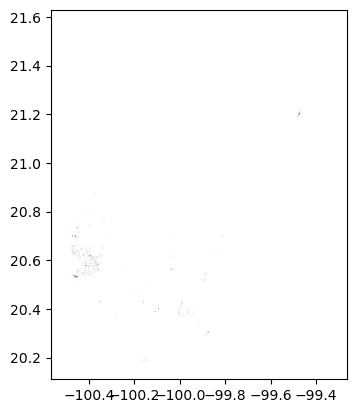

In [5]:
gdf.plot()
#f, axx = plt.subplots(1, figsize=(8, 8))
#axx = gdf.plot(axes=axx, alpha=1)
#gdf.xlim(-103.8, -102.8)
#gdf.ylim(20.3, 21)
#plt.show()
#trabajar con resolución 11
#city: gdl

### GeoDataFrame Object of 'Queretaro' in Hexagons

In [6]:
hex_schema = "hexgrid"
hex_table = "hexgrid_8_city"
c = 'Queretaro'
query = f'SELECT * FROM {hex_schema}.{hex_table} WHERE \"metropolis\" LIKE \'{c}\''
hex_gdl = aup.gdf_from_query(query, geometry_col='geometry')
hex_gdl.head(5)

,geometry,hex_id_8,CVEGEO,metropolis
0,"POLYGON ((-100.50489 20.41229, -100.50986 20.4...",884983d331fffff,11004,Queretaro
1,"POLYGON ((-100.51119 20.48993, -100.51616 20.4...",884983d18dfffff,11004,Queretaro
2,"POLYGON ((-100.54426 20.42475, -100.54384 20.4...",884983d06bfffff,11004,Queretaro
3,"POLYGON ((-100.57242 20.41726, -100.56745 20.4...",884983d05dfffff,11004,Queretaro
4,"POLYGON ((-100.54645 20.51054, -100.55143 20.5...",884983d19bfffff,11004,Queretaro


### Plot 'Hexagons-Queretaro'

/opt/conda/lib/python3.10/site-packages/geopandas/plotting.py:649: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


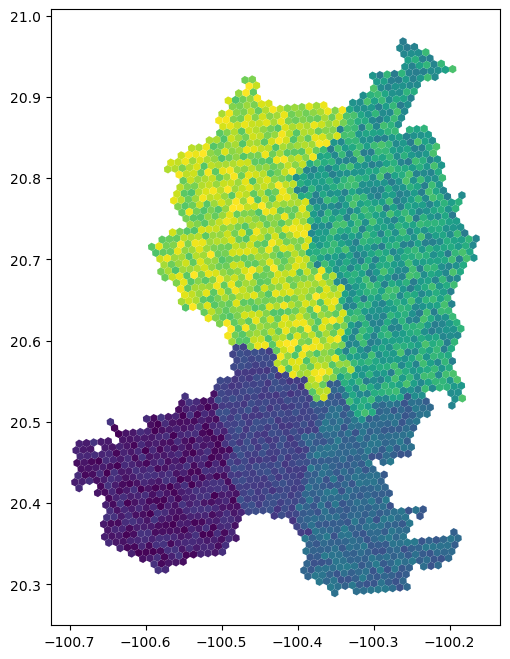

In [7]:
f, ax = plt.subplots(1, figsize=(8, 8))
ax = hex_gdl.plot(axes=ax, cmap = 'viridis',alpha= 1)
plt.show()

In [8]:
import leafmap

### Intersección Espacial

In [9]:
m = leafmap.Map()
m.add_gdf(gdf, layer_name="Espacios públicos", zoom_to_layer=True)
m.add_gdf(hex_gdl, layer_name="Hexagonos",zoom_to_layer=True)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

Vemos que hay espacios públicos en ciudades afuera de la zona de Querétaro como San Juan del Río y Tequisquiapan. Entonces vamos a eliminar esos espacios para solo enfocarnos en la zona de la ciudad de Querétaro.

In [14]:
selected_values = ['220010001', '220160008', '220160043', '220160001', '220160024', '220120011', '220120020', '220120003', '220120031', '220120001', '220120028', '220160066', '220170007', '220170008', '220170019', '220170001','220040001','22007047','220040072','220070003','220150001','220180001','220180050','22009001','220050001','220050002','220070001','220070047','220160070','220160072','220160033','220160002','220170002']
gdf_nuevo = gdf[~gdf['cvegeo'].isin(selected_values)]
gdf_nuevo['cvegeo'].unique()

array(['220020001', '220030001', '220060001', '220060010', '220060017',
       '220060019', '220060044', '220060142', '220080001', '220080037',
       '220090001', '220100001', '220110001', '220110005', '220110006',
       '220110017', '220110026', '220110032', '220110049', '220110067',
       '220110073', '220110439', '220130001', '220140001', '220140051',
       '220140058', '220140075', '220140085', '220140092', '220140101',
       '220140103', '220140105', '220140107', '220140108', '220140110',
       '220140236'], dtype=object)

In [15]:
mapa = leafmap.Map()
mapa.add_gdf(gdf_nuevo, layer_name="Espacios públicos", zoom_to_layer=True)
mapa.add_gdf(hex_gdl, layer_name="Hexagonos",zoom_to_layer=True)
mapa

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [10]:
#Segundo paso: Ver variables dependientes para el modelo de predicción